In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# data downloaded from https://www.gov.uk/government/collections/national-travel-survey-statistics and saved as .xlsx

england = pd.read_excel('nts0303.xlsx', skiprows=8, nrows=16).T #number of trips
england.columns = england.iloc[0]
england = england.iloc[1:19]
england

Main mode,Private:,Walk1,Walks of over a mile,Bicycle,Car / van driver,Car / van passenger,Motorcycle,Other private transport2,Public:,Bus in London,Other local bus,Non-local bus,London Underground,Surface Rail,Taxi / minicab,Other public transport3
2002,NaN,264.013,75.1025,18.0294,438.414,239.935,3.85201,8.24011,NaN,17.2762,46.2215,0.777457,10.7414,13.4578,11.5978,1.86811
2003,NaN,269.029,76.4887,16.4022,426.701,232.711,4.05104,7.73458,NaN,16.8914,46.988,0.995204,9.11673,14.332,11.7111,2.99567
2004,NaN,273.112,78.6271,17.1456,421.209,227.646,3.54183,8.24228,NaN,18.2231,45.1089,0.759567,8.54557,16.9553,10.7313,2.30422
2005,NaN,271.592,74.2034,15.2908,434.307,234.374,3.86613,8.40856,NaN,19.0321,42.7854,0.882359,8.60613,16.1593,11.2936,3.21153
2006,NaN,275.206,73.965,17.4824,431.845,226.676,3.26039,7.36459,NaN,18.1599,46.2588,0.637133,9.59334,16.9306,10.1617,3.44306
2007,NaN,239.606,73.1361,14.6173,409.239,218.646,3.37669,7.55654,NaN,20.0372,43.869,0.973332,9.66375,17.5651,10.397,2.25104
2008,NaN,241.851,72.651,16.8486,409.965,225.983,4.00911,8.55371,NaN,20.638,44.1978,0.664615,10.5101,18.3704,10.4467,2.13202
2009,NaN,250.174,71.03,16.4033,392.81,218.43,3.0965,8.57571,NaN,21.7085,45.2133,0.57224,10.3983,17.0342,10.1016,2.13607
2010,NaN,234.312,65.3104,15.3741,401.784,212.467,2.86976,7.13067,NaN,24.6698,42.1646,0.621615,9.17385,19.498,9.37832,2.4564
2011,NaN,241.827,69.5051,16.4056,392.473,209.104,3.57759,6.40788,NaN,20.7087,42.0459,0.529632,8.95924,17.4257,9.89494,2.46022


In [4]:
england.drop(columns=['Private:', 'Public:'], inplace=True)

In [5]:
eng = pd.DataFrame()
eng['Active Transport'] = england['Walk1'] + england['Walks of over a mile'] + england['Bicycle']

eng['Contaminant Transport'] = england.drop(columns=['Walk1', 'Walks of over a mile','Bicycle']).sum(1)
eng

,Active Transport,Contaminant Transport
2002,357.145,792.381771
2003,361.92,774.227272
2004,368.884,763.266953
2005,361.086,782.926511
2006,366.653,774.330659
2007,327.36,743.573822
2008,331.35,755.470371
2009,337.607,730.076434
2010,314.997,732.214530
2011,327.738,713.586430


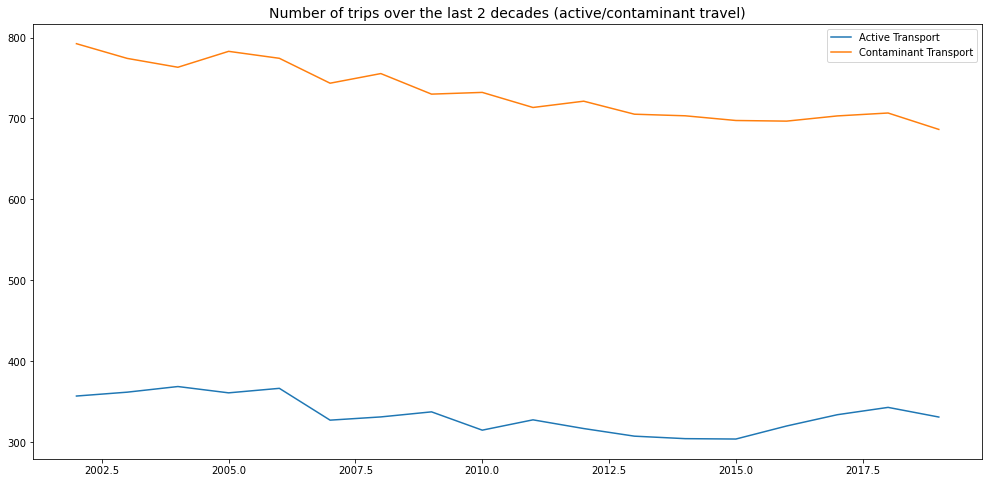

In [7]:
plt.figure(figsize=(17,8))
plt.plot(eng.index, eng['Active Transport'], label ='Active Transport')
plt.plot(eng.index, eng['Contaminant Transport'], label ='Contaminant Transport')
plt.title('Number of trips over the last 2 decades (active/contaminant travel)', fontsize=14)
plt.legend()
plt.show()